In [1]:
# Several face detection methods. Running on face1
import numpy as np
import os
import face_recognition as frg
from sklearn.neighbors import KNeighborsClassifier
import re
import math
import mtcnn
import matplotlib.pyplot as plt

In [2]:
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display

def show_face(img_path, location):
    pil_image = Image.open(img_path).convert("RGB")
    (top,right, bottom, left) = location

    draw = ImageDraw.Draw(pil_image)
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))
    display(pil_image)

In [3]:
# dlib get_frontal_face_detector()

import dlib
import cv2
detector = dlib.get_frontal_face_detector()
img_path = 'maskedface/train/00108/001.jpg'
img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = detector(gray, 1) # result
#to draw faces on image
for result in faces:
    left = result.left()
    top = result.top()
    right = result.right()
    bottom = result.bottom()
    location = [top,right,bottom, left]
    
    show_face(img_path, location)

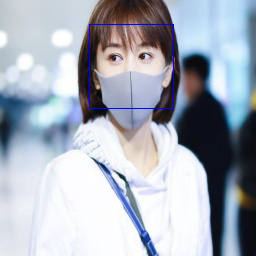

In [4]:
# Haar Cascade
# https://towardsdatascience.com/face-detection-models-which-to-use-and-why-d263e82c302c

import cv2
classifier = cv2.CascadeClassifier('models/haarcascade_frontalface_alt2.xml')
img_path = 'maskedface/train/00108/001.jpg'
img = cv2.imread(img_path)
faces = classifier.detectMultiScale(img)# result
#to draw faces on image
for result in faces:
    x, y, w, h = result
    location = [y, x+w,y+h, x]
    show_face(img_path, location)

In [6]:
# Frontal face detector of DNN module
# https://towardsdatascience.com/face-detection-models-which-to-use-and-why-d263e82c302c

import cv2
import numpy as np
modelFile = "models/res10_300x300_ssd_iter_140000.caffemodel"
configFile = "models/deploy.prototxt.txt"
net = cv2.dnn.readNetFromCaffe(configFile, modelFile)
img = cv2.imread('maskedface/train/00108/001.jpg')
h, w = img.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(img, (300, 300)), 1.0, (300, 300), (104.0, 117.0, 123.0))
net.setInput(blob)
faces = net.forward()
#to draw faces on image
for i in range(faces.shape[2]):
        confidence = faces[0, 0, i, 2]
        if confidence > 0.5:
            box = faces[0, 0, i, 3:7] * np.array([w, h, w, h])
            (x, y, x1, y1) = box.astype("int")
            location = [y,]
            cv2.rectangle(img, (x, y), (x1, y1), (0, 0, 255), 2)

len(faces): 1
x, y, w, h: 424 168 285 390
m_locations: [168, 709, 558, 424]
f_locations: [(241, 740, 562, 419)]


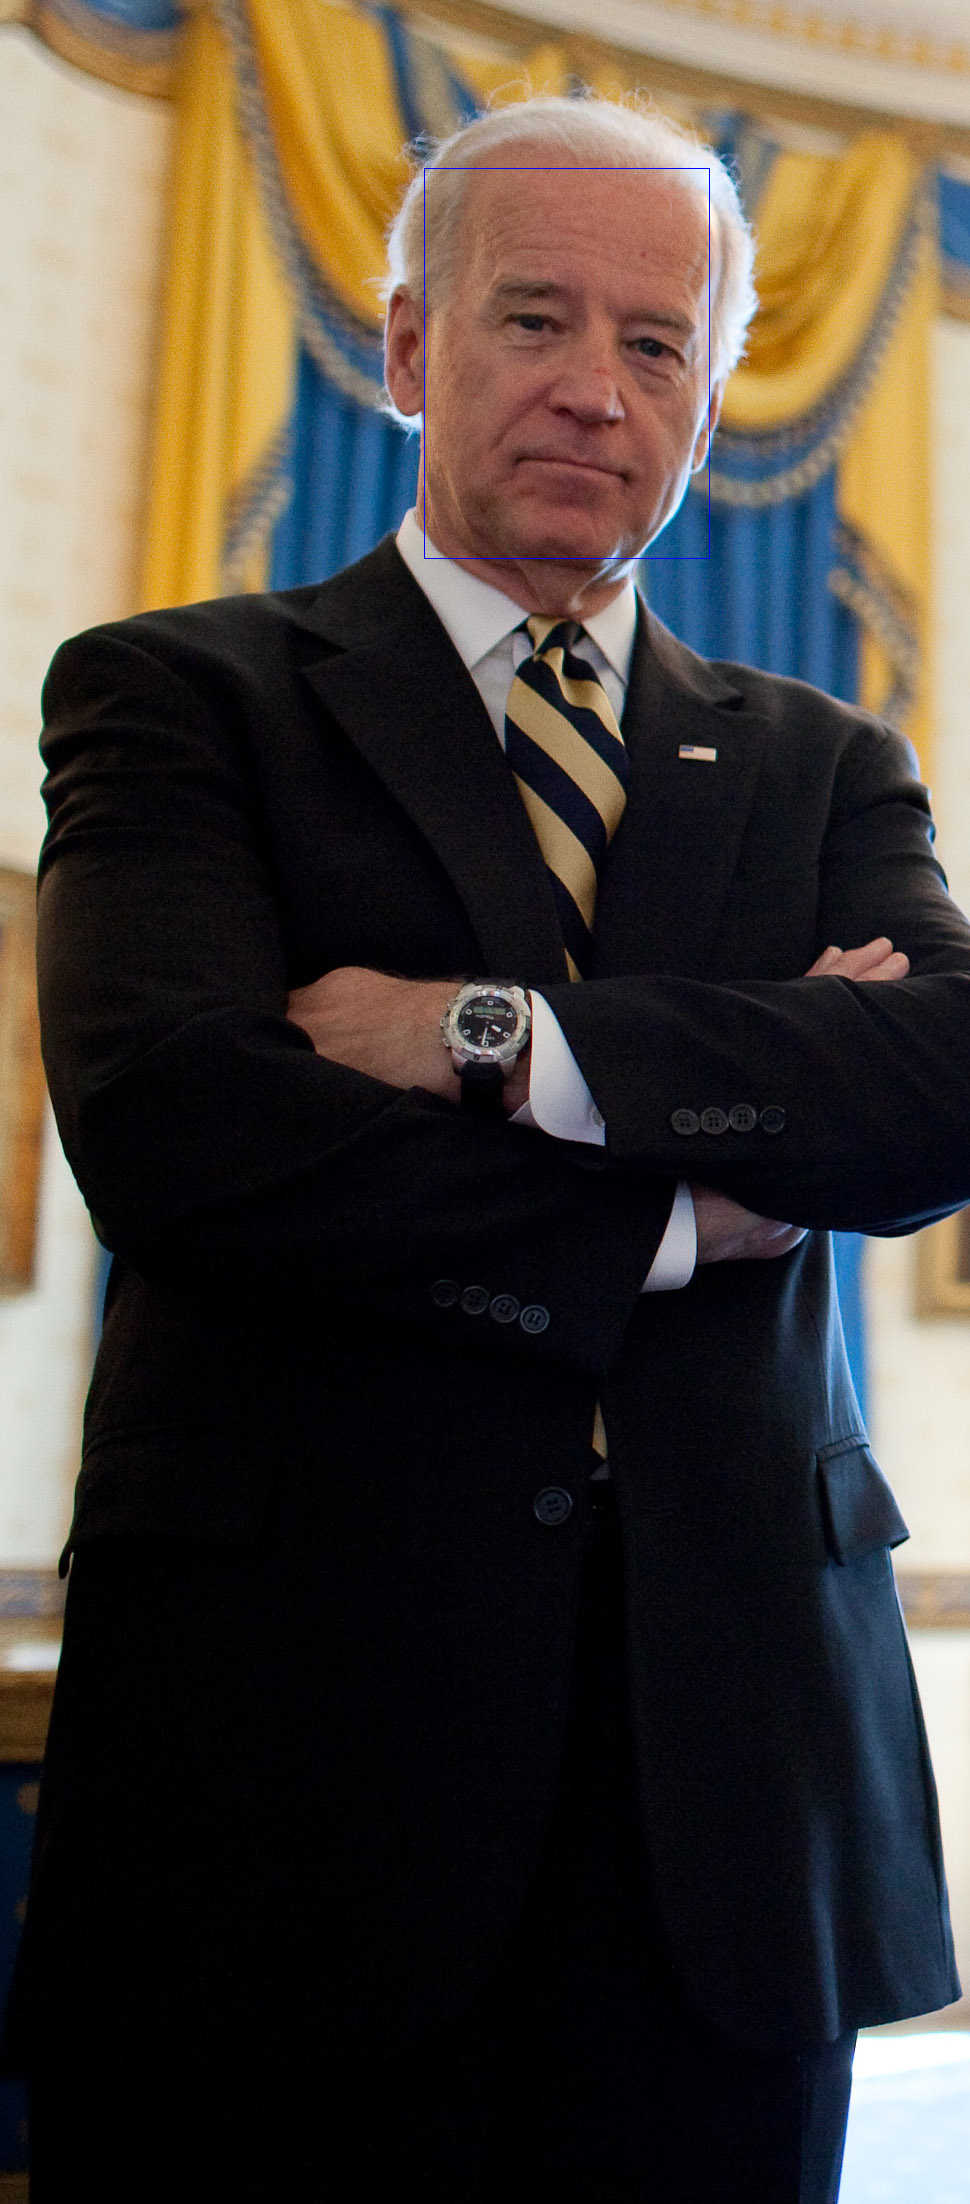

In [9]:
# Compare bounding box from MTCNN and face_recognition
filename = 'knn_examples/train/biden/biden.jpg' # filename is defined above, otherwise uncomment
# load image from file
pixels = plt.imread(filename) # defined above, otherwise uncomment
# detector is defined above, otherwise uncomment
detector = mtcnn.MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
print('len(faces):',len(faces))
for result in faces:
    # get coordinates
    x, y, w, h = result['box']
    print('x, y, w, h:',x, y, w, h)
    m_location = [y, x+w,y+h, x]
    print('m_locations:',m_location)
        
f_locations = frg.face_locations(pixels, model='hog')
# display faces on the original image

print('f_locations:',f_locations)
#draw_facebox(filename, faces)

show_face(filename, m_location)

In [5]:
# Get face landmarks
filename = 'maskedface/train/00108/003.jpg' # filename is defined above, otherwise uncomment
# load image from file
pixels = plt.imread(filename) # defined above, otherwise uncomment
# detector is defined above, otherwise uncomment
detector = mtcnn.MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
print('len(faces):',len(faces))
for result in faces:
    # get coordinates
    print('m_face:',result)
    x, y, w, h = result['box']
    #print('x, y, w, h:',x, y, w, h)
    m_location = [(y, x+w,y+h, x)]
    print('m_locations:',m_location)
    m_landmarks = frg.face_landmarks(pixels, face_locations=m_location, model='large')
    print('m_landmarks:',m_landmarks)    

f_locations = frg.face_locations(pixels, model='cnn')
for d_loc in f_locations:
    d_loc = [d_loc]
    print('dlib_face_location:', d_loc)
    f_landmarks = frg.face_landmarks(pixels, face_locations=d_loc, model='large')
    print('f_landmarks:',f_landmarks)    


# display faces on the original image
print('f_locations:',f_locations)
#draw_facebox(filename, faces)
# get inside tuple
#[m_location]=m_location
#show_face(filename, m_location)

len(faces): 1
m_face: {'box': [111, 52, 30, 35], 'confidence': 0.9989350438117981, 'keypoints': {'left_eye': (119, 65), 'right_eye': (133, 64), 'nose': (126, 71), 'mouth_left': (123, 79), 'mouth_right': (133, 78)}}
m_locations: [(52, 141, 87, 111)]
m_landmarks: [{'chin': [(112, 66), (112, 70), (113, 73), (114, 77), (115, 81), (117, 83), (120, 85), (123, 86), (126, 86), (130, 86), (134, 85), (138, 84), (140, 82), (142, 79), (143, 75), (144, 71), (145, 67)], 'left_eyebrow': [(114, 60), (115, 59), (118, 58), (120, 58), (123, 59)], 'right_eyebrow': [(129, 59), (132, 59), (135, 59), (138, 61), (140, 63)], 'nose_bridge': [(126, 62), (125, 63), (125, 64), (125, 66)], 'nose_tip': [(123, 70), (124, 70), (125, 70), (127, 70), (128, 70)], 'left_eye': [(116, 64), (118, 63), (120, 63), (121, 64), (120, 64), (118, 64)], 'right_eye': [(131, 64), (133, 64), (135, 64), (137, 65), (135, 65), (133, 65)], 'top_lip': [(121, 77), (123, 75), (124, 74), (125, 74), (126, 74), (128, 75), (131, 77), (129, 77), (